In [1]:
import pandas as pd 
from pandas_datareader import data as pdr 
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
enddate = date.datetime(2020,3,20)
startdate = date.datetime(2019,3,20)
tick= 'BBVA'
ipc = pdr.get_data_yahoo(tick,start = startdate,end = enddate)

In [3]:
ipc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,6.21,6.13,6.17,6.15,3099000.0,5.516053
2019-03-21,6.13,6.08,6.10,6.09,2793700.0,5.462238
2019-03-22,5.96,5.80,5.94,5.83,6179500.0,5.229039
2019-03-25,5.93,5.83,5.90,5.84,4050000.0,5.238008
2019-03-26,5.83,5.73,5.82,5.79,5662500.0,5.193161


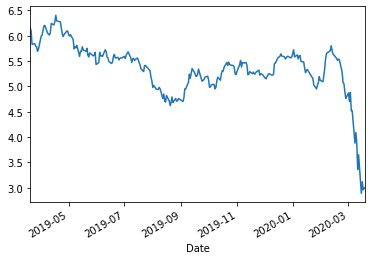

In [4]:
%matplotlib inline 
ipc.Close.plot()

In [5]:
def MA(df,n):
    MA = pd.Series(pd.Series.rolling(df['Close'],n).mean(), name= 'MA_' + str(n))
    df=df.join(MA)
    return df

ma_30 = MA(ipc,30)
ma_60 = MA(ma_30,60)

In [6]:
ma_60.head()

,High,Low,Open,Close,Volume,Adj Close,MA_30,MA_60
Date,,,,,,,,
2019-03-20,6.21,6.13,6.17,6.15,3099000.0,5.516053,NaN,NaN
2019-03-21,6.13,6.08,6.10,6.09,2793700.0,5.462238,NaN,NaN
2019-03-22,5.96,5.80,5.94,5.83,6179500.0,5.229039,NaN,NaN
2019-03-25,5.93,5.83,5.90,5.84,4050000.0,5.238008,NaN,NaN
2019-03-26,5.83,5.73,5.82,5.79,5662500.0,5.193161,NaN,NaN


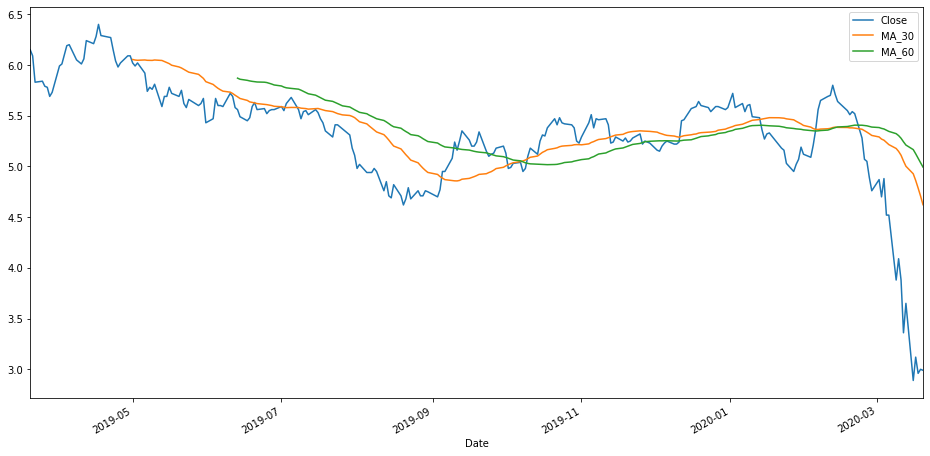

In [7]:
df=ma_60[['Close','MA_30','MA_60']]
df.plot(figsize =(16,8)) 

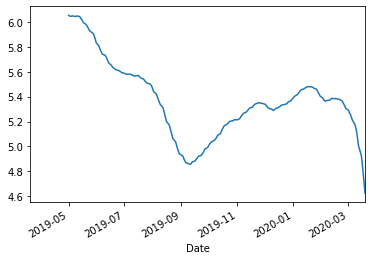

In [8]:
df.MA_30.plot()

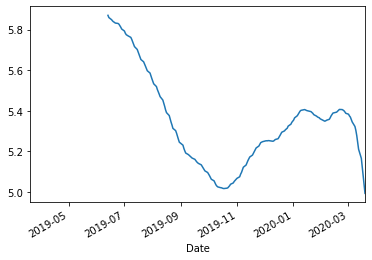

In [9]:
df.MA_60.plot()

In [10]:
df

,Close,MA_30,MA_60
Date,,,
2019-03-20,6.15,NaN,NaN
2019-03-21,6.09,NaN,NaN
2019-03-22,5.83,NaN,NaN
2019-03-25,5.84,NaN,NaN
2019-03-26,5.79,NaN,NaN
2019-03-27,5.78,NaN,NaN
2019-03-28,5.69,NaN,NaN
2019-03-29,5.73,NaN,NaN
2019-04-01,5.99,NaN,NaN


In [12]:
df.loc[df['MA_30'] < df['MA_60'] , 'Digito'] = -1
df.loc[df['MA_30'] > df['MA_60'] , 'Digito'] = 1


df.loc[df['MA_30'] < df['MA_60'] , 'Comportamiento'] = 'Media corta es menor que media larga'
df.loc[df['MA_30'] > df['MA_60'] , 'Comportamiento'] = 'Media corta es mayor que media larga'

In [13]:
pd.set_option('display.max_rows', None)

In [14]:
df.Digito.diff()

Date
2019-03-20    NaN
2019-03-21    NaN
2019-03-22    NaN
2019-03-25    NaN
2019-03-26    NaN
2019-03-27    NaN
2019-03-28    NaN
2019-03-29    NaN
2019-04-01    NaN
2019-04-02    NaN
2019-04-03    NaN
2019-04-04    NaN
2019-04-05    NaN
2019-04-08    NaN
2019-04-09    NaN
2019-04-10    NaN
2019-04-11    NaN
2019-04-12    NaN
2019-04-15    NaN
2019-04-16    NaN
2019-04-17    NaN
2019-04-18    NaN
2019-04-22    NaN
2019-04-23    NaN
2019-04-24    NaN
2019-04-25    NaN
2019-04-26    NaN
2019-04-29    NaN
2019-04-30    NaN
2019-05-01    NaN
2019-05-02    NaN
2019-05-03    NaN
2019-05-06    NaN
2019-05-07    NaN
2019-05-08    NaN
2019-05-09    NaN
2019-05-10    NaN
2019-05-13    NaN
2019-05-14    NaN
2019-05-15    NaN
2019-05-16    NaN
2019-05-17    NaN
2019-05-20    NaN
2019-05-21    NaN
2019-05-22    NaN
2019-05-23    NaN
2019-05-24    NaN
2019-05-28    NaN
2019-05-29    NaN
2019-05-30    NaN
2019-05-31    NaN
2019-06-03    NaN
2019-06-04    NaN
2019-06-05    NaN
2019-06-06    NaN
2019-

In [15]:
df.loc[df['MA_30'] < df['MA_60'] , 'Restadigito'] = df.Digito.diff()
df.loc[df['MA_30'] > df['MA_60'] , 'Restadigito'] = df.Digito.diff()

In [16]:
df.loc[df['Restadigito'] == 2 , 'Estrategia'] = 'Golden Cross'
df.loc[df['Restadigito'] == -2 , 'Estrategia'] = 'Death Cross'

df.loc[df['Restadigito'] == 2 , 'Recomendacion'] = 'Comprar'
df.loc[df['Restadigito'] == -2 , 'Recomendacion'] = 'Vender'

df["MA_30"] = df["MA_30"].fillna("-")
df["MA_60"] = df["MA_60"].fillna("-")
df["Digito"] = df["Digito"].fillna("-")
df["Comportamiento"] = df["Comportamiento"].fillna("-")
df["Restadigito"] = df["Restadigito"].fillna("-")
df["Estrategia"] = df["Estrategia"].fillna("-")
df["Recomendacion"] = df["Recomendacion"].fillna("-")

In [17]:
df[['Close','Estrategia', 'Recomendacion']]

,Close,Estrategia,Recomendacion
Date,,,
2019-03-20,6.15,-,-
2019-03-21,6.09,-,-
2019-03-22,5.83,-,-
2019-03-25,5.84,-,-
2019-03-26,5.79,-,-
2019-03-27,5.78,-,-
2019-03-28,5.69,-,-
2019-03-29,5.73,-,-
2019-04-01,5.99,-,-
